# PCA(Principal Component analysis)

I am using MNIST dataset for applying PCA.The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.The database is also widely used for training and testing in the field of machine learning.It was created by "re-mixing" the samples from NIST's original datasets

#### DATASET DESCRIPTION

##### MNIST dataset can be downloaded from Kaggle : 
https://www.kaggle.com/c/digit-recognizer/data

1) Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker.

2) This pixel-value is an integer between 0 and 255, inclusive.

3) The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.


In [1]:
# importing neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
# reading the dataset into a dataframe
d1=pd.read_csv('mnist_train.csv')

# print first five rows of d1.
print(d1.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [8]:
# saving the first feature "label" into a different variable
l=d1["label"]

# dropping the feature "label" from the dataset
d=d1.drop("label",axis=1)

In [9]:
print(l.head())

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


In [12]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


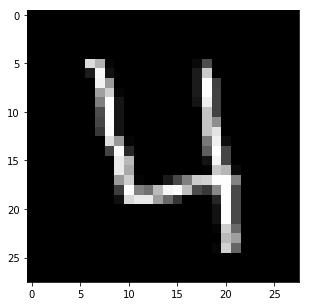

the number given in the label is  4


In [14]:
# display or plot a number.
plt.figure(figsize=(5,5))
idx = 3

grid_data = d.iloc[idx].as_matrix().reshape(28,28) #reshape from 1d to 2d pixel array(As the data is stored in a row)
plt.imshow(grid_data, interpolation = "none", cmap = "gray")# for displaying an image..
plt.show()

print("the number given in the label is ",l[idx])

In [15]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(d)
print(standardized_data.shape)


(42000, 784)


In [16]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of covariance matrix = ", covar_matrix.shape)

The shape of covariance matrix =  (784, 784)


In [40]:
# finding the top two eigen-values and corresponding eigen-vectors for projecting onto a 2-Dim space.
from scipy.linalg import eigh

# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))
vectors=vectors.T
print("Shape of eigen vectors = ",vectors.shape)

Shape of eigen vectors =  (2, 784)


In [19]:
print("the two eigen values are ",values)

the two eigen values are  [ 1222652.44613786  1709211.41082575]


In [41]:
df=pd.DataFrame(data=vectors)
print("THE CORRESSPONDING TWO EIGEN VECTORS ARE :-")
#displaying only the first 15 rows
print(df.head(15))

THE CORRESSPONDING TWO EIGEN VECTORS ARE :-
   0    1    2    3    4    5    6    7    8    9   ...        774       775  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.017460  0.013766   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...  -0.001036  0.000056   

        776       777       778       779  780  781  782  783  
0  0.009949  0.006383  0.004141  0.002993  0.0  0.0  0.0  0.0  
1  0.000595  0.000928  0.000981  0.000929  0.0  0.0  0.0  0.0  

[2 rows x 784 columns]


In [53]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

new_coordinates = np.matmul(vectors,sample_data.T)
print (" resultanat new data points' shape ",vectors.shape, "X",sample_data.T.shape ," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 42000)  =  (2, 42000)


In [54]:
# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, l)).T
print(new_coordinates.shape)

(42000, 3)


In [55]:
# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


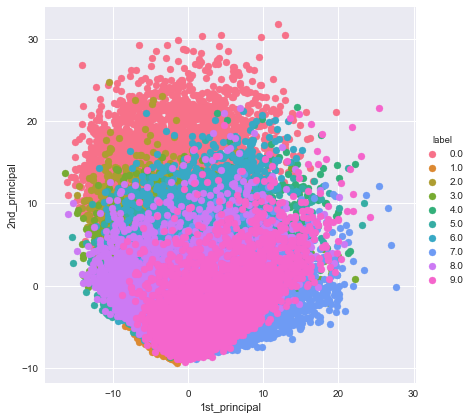

In [56]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA using Scikit-Learn

In [58]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [59]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


shape of pca_reduced.shape =  (42000, 2)


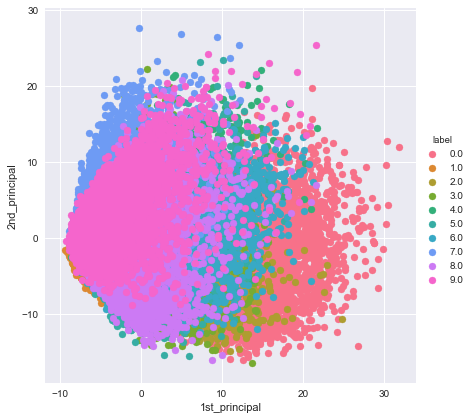

In [60]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, l)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA for dimensionality redcution (not for visualization)

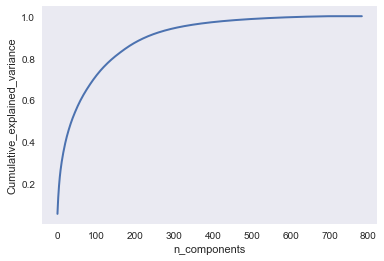

In [61]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is explained.